### Hanan Sherka 
### Lab #6 - Midterm Project
### Maternal Mortality and GDP Analysis
### Sconyers, Period 2
### Due: November 13th, 2018

## Introduction 

In this lab, I analyzed maternal mortality rates of countries compared to their yearly GDP 
to explore possible correlation. I did this by merging two datasets - one on maternal mortality rates over time, and the other on yearly GDP over time- and compared the GDPs and maternal mortality rates across three years that had the most data. 

Maternal mortality in the context of this data is described as death of a woman while she is pregnant or withing 42 days after her pregnancy, if it is directly related to, in any way, her pregnancy. The ratios provided is the number of deaths per 100,000 live births. 

GDP in the context of this data is the yearly total GDP per capita. 

## Dataset Preparation 

### Data Sources 

    I acquired these datasets from gapminder, a website that provides international data on an array of topics.The GDP data actually originates from the World Bank data. I chose these two because I had assumptions about correlation before hand. 
    Link to Maternal Mortality Rates data: https://www.gapminder.org/data/documentation/gd010/
    Link to Annual GDP data: https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG

### Open, Read, and Basic Info 

In [185]:
# Always include aliased packages
import math as m 
import numpy as np
import scipy as sp 
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

In [186]:
# One line to open and read an excel file into a data frame data structure, make the first row the header,
# then close the file. 
df_gdp = pd.read_csv('gdp_total_yearly_growth.csv')
df_mm = pd.read_csv('maternal_mortality_ratio_per_100000_live_births.csv')

In [187]:
# Print the first couple of lines to ensure that everything is correct in the gdp data frame
df_gdp.head ()

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,6.55,12.40,4.56,13.600,2.50,20.20,8.04,6.98,14.80,4.47
1,Albania,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,0.418,...,5.97,5.53,5.77,5.850,7.24,3.28,3.36,2.86,2.64,2.06
2,Algeria,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,0.356,...,5.41,5.38,1.72,3.420,2.02,1.70,3.57,2.31,2.58,2.99
3,Andorra,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,0.166,...,8.64,7.80,4.97,0.161,-4.22,-5.06,-3.43,-2.83,NaN,NaN
4,Angola,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,0.425,...,11.20,20.50,18.60,23.200,13.80,2.39,3.45,3.87,4.96,3.79


In [188]:
# Print basic information on the dataset about gdp 
df_gdp.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 214 entries, country to 2013
dtypes: float64(213), object(1)
memory usage: 324.4+ KB


In [189]:
# Print the first couple of lines to ensure that everything is correct in the maternal mortality data frame 
df_mm.head ()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,730.0,NaN,NaN,NaN,NaN,500.0,NaN,NaN,400.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,24.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,21.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,NaN,92.0,NaN,NaN,89.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,750.0,NaN,NaN,NaN,NaN,530.0,NaN,NaN,460.0


In [190]:
# Print basic information on the dataset about maternal mortality 
df_mm.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Columns: 215 entries, country to 2013
dtypes: float64(214), object(1)
memory usage: 314.2+ KB


### Merging 

In [191]:
# Create a dataset for the years 2005, 2010, and 2013, that has the GDP and Maternal Mortality rates
df_2011 = pd.merge (df_mm [['country','2005', '2010', '2013']],
                   df_gdp [['country', '2005', '2010', '2013']],
                    on = 'country')
df_2011.head ()

,country,2005_x,2010_x,2013_x,2005_y,2010_y,2013_y
0,Afghanistan,730.0,500.0,400.0,12.40,8.04,4.47
1,Albania,24.0,21.0,21.0,5.53,3.36,2.06
2,Algeria,100.0,92.0,89.0,5.38,3.57,2.99
3,Andorra,NaN,NaN,NaN,7.80,-3.43,NaN
4,Angola,750.0,530.0,460.0,20.50,3.45,3.79


In [192]:
# Set the country names to be the index in the GDP data frame 
df_2011.rename(columns={df_2011.columns[1]: "2005_mm",
                         df_2011.columns[2]: "2010_mm",
                         df_2011.columns[3]: "2013_mm",
                         df_2011.columns[4]: "2005_gdp",
                         df_2011.columns[5]: "2010_gdp",
                         df_2011.columns[6]: "2013_gdp",}, 
                 inplace=True)
df_2011.head(187)
df_2011.head ()

,country,2005_mm,2010_mm,2013_mm,2005_gdp,2010_gdp,2013_gdp
0,Afghanistan,730.0,500.0,400.0,12.40,8.04,4.47
1,Albania,24.0,21.0,21.0,5.53,3.36,2.06
2,Algeria,100.0,92.0,89.0,5.38,3.57,2.99
3,Andorra,NaN,NaN,NaN,7.80,-3.43,NaN
4,Angola,750.0,530.0,460.0,20.50,3.45,3.79


## Data Modeling 

### Finding Correlation Coefficient 

In [193]:
# Created a new dataframe that included just 2005 gdp and maternal mortality, and found the
# correlation coeffiecient
df_new2005 = df_2011[['2005_gdp', '2005_mm']]
df_new2005.corr()

,2005_gdp,2005_mm
2005_gdp,1.000000,0.041696
2005_mm,0.041696,1.000000


In [194]:
# Created a new dataframe that included just 2005 gdp and maternal mortality, and found the
# correlation coeffiecient
df_new2010 = df_2011[['2010_gdp', '2010_mm']]
df_new2010.corr()

,2010_gdp,2010_mm
2010_gdp,1.00000,0.16503
2010_mm,0.16503,1.00000


In [195]:
# Created a new dataframe that included just 2005 gdp and maternal mortality, and found the
# correlation coeffiecient
df_new2013 = df_2011[['2013_gdp', '2013_mm']]
df_new2013.corr()

,2013_gdp,2013_mm
2013_gdp,1.000000,0.190953
2013_mm,0.190953,1.000000


### Data Visualizations 

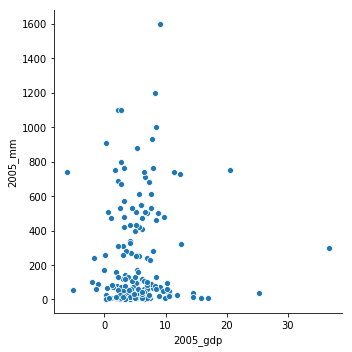

In [196]:
# I created a scatter plot to visually analyze and trends in data for 2005 when comparing 
# maternal mortality and gdp 
sns.relplot(x="2005_gdp", y="2005_mm",
            data = df_new2005, kind="scatter")


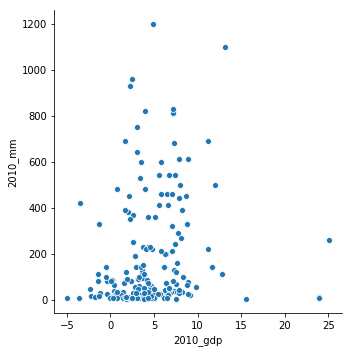

In [197]:
# I created a scatter plot to visually analyze and trends in data for 2010 when comparing 
# maternal mortality and gdp 
sns.relplot(x="2010_gdp", y = "2010_mm", 
            data = df_new2010, kind="scatter" )


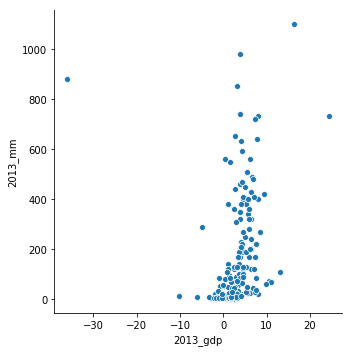

In [198]:
# I created a scatter plot to visually analyze and trends in data for 2013 when comparing 
# maternal mortality and gdp 
sns.relplot(x="2013_gdp", y = "2013_mm",  
            data = df_new2013, kind="scatter" )


## Analysis and Conclusion 

From the data modeling I did from this lab, I have concluded that the annual GDP per capita in a country does not correlate with the maternal mortality rate of said country. Initially, I took three separate years - 2005, 2010, and 2013 - and I found the correlation coefficient of each year. The magnitude of all three correlation coefficients was quite low, the highest being in 2013, with a correlation coefficient of approximately 0.19. This is a positive correlation, but, being signifiantly below .5, I think the correlation is not strong enough to be of any significance.
   
I then tried to visually analyze this through scatter plots for each of this years. But, it became clear that regardless of GDP, there was a large range of maternal mortality rates per country, and there was not recognizable trend in that regard. However, I realized that when comparing the three years, that the GDP was increasing. In 2013, the GDPs are mostly concentrated between 0 and 10, but in 2010, GDP it is spread mostly between -5 and 0. 
   
One thing I would like to further look into is how GDP has changed over the years, and whether there is a correlation between year and GDP. I would also like to look into how other factors would affect maternal mortality, such as number of hospitals per a certain number group of people. I would do this if I had more time, and is an area possible for further exploration.  

## Acknowledgements

I would like to acknowledge Ms. Sconyers for providing code on merging two datasets, and creating new dataframes using columns from existing ones. I also used code I got from this website to find how to find correlation coefficients: http://benalexkeen.com/correlation-in-python/. Lastly, I used code from the class "Useful Visualizations" document, to create my scatterplots from this lab. 